In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

import scipy.stats as stats 
from scipy.stats import chi2_contingency, boxcox

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
data = pd.read_csv("Data_Sets/Maternal Health Risk Data Set.csv")
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [58]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [60]:
data[data.duplicated(keep='first')]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [61]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [62]:
data[data.Age > 60]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
114,63,140,90,15.0,98.0,90,high risk
313,62,120,80,6.9,98.0,66,low risk
322,65,90,60,6.9,98.0,70,low risk
326,66,85,60,6.9,98.0,86,low risk
338,70,85,60,6.9,102.0,70,low risk
339,65,120,90,6.9,103.0,76,low risk
435,65,130,80,15.0,98.0,86,high risk
502,63,140,90,15.0,98.0,90,high risk


In [63]:
len(data[data.Age < 13])

39

In [64]:
data.BodyTemp.value_counts()

BodyTemp
98.0     804
101.0     98
102.0     66
100.0     20
103.0     13
99.0      10
98.4       2
98.6       1
Name: count, dtype: int64

In [65]:
data[data.HeartRate < 60]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk
908,16,120,75,7.9,98.0,7,low risk


In [66]:
df = data.copy()

In [67]:
df = df.drop_duplicates().reset_index(drop=True)

In [68]:
df.shape

(452, 7)

In [69]:
df.HeartRate.mode()

0    70
Name: HeartRate, dtype: int64

In [70]:
df.loc[df.HeartRate == 7, "HeartRate"] = 70

In [71]:
df.RiskLevel.unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [72]:
df.replace({"high risk":2, "mid risk":1, "low risk":0}, inplace=True)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


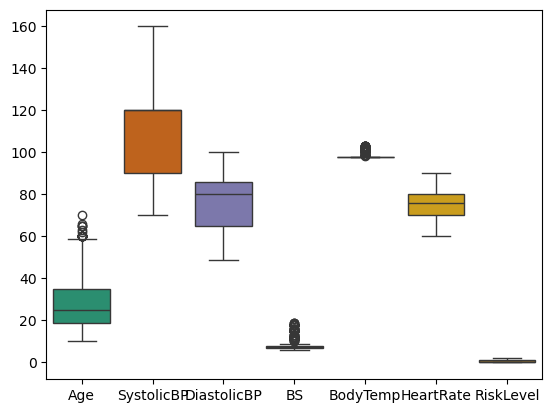

In [73]:
sns.set_palette("Dark2")

sns.boxplot(df);

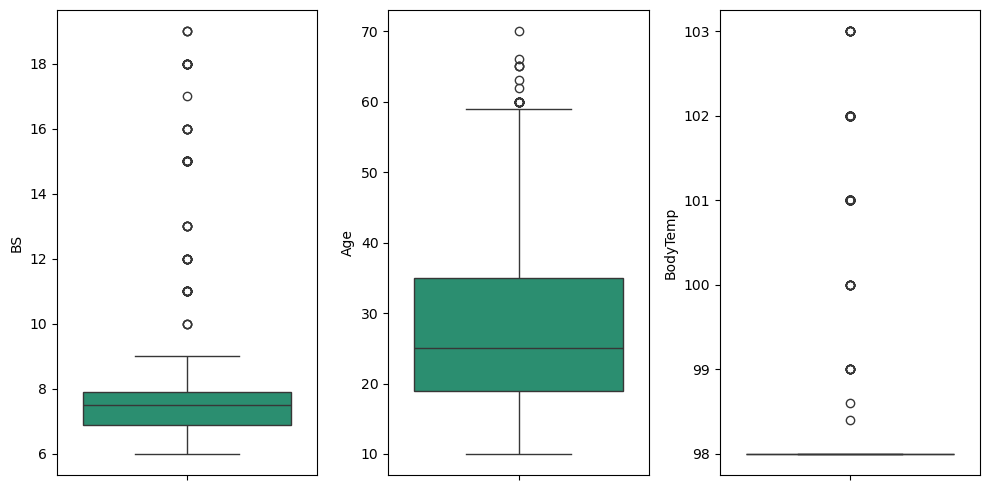

In [74]:
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'BS', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Age', data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'BodyTemp', data = df)

plt.tight_layout()
plt.show();

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


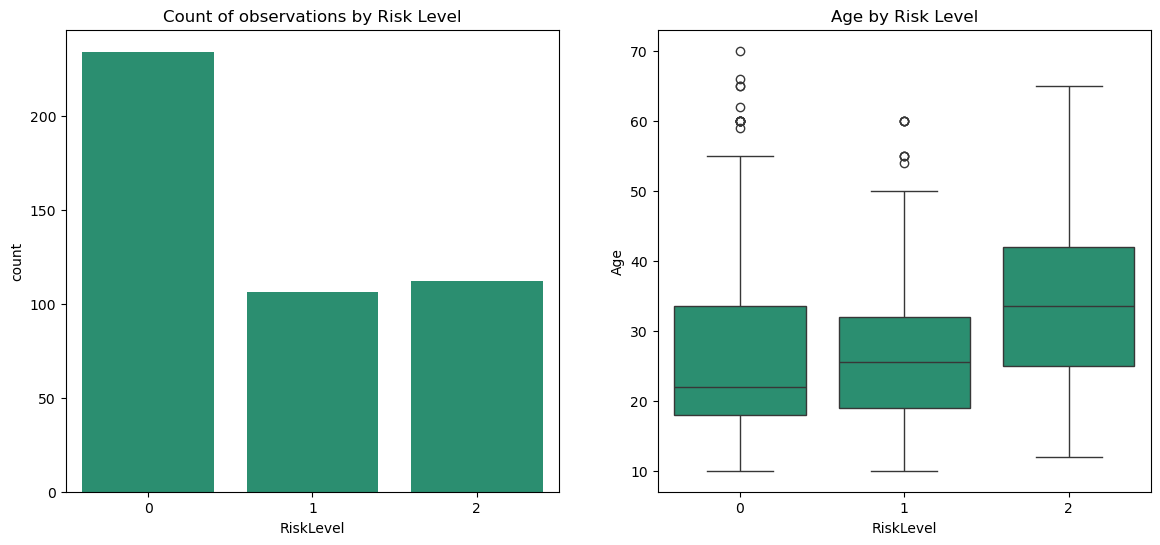

In [75]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=df.RiskLevel)
axes[0].set_title("Count of observations by Risk Level")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.Age)
axes[1].set_title("Age by Risk Level");

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


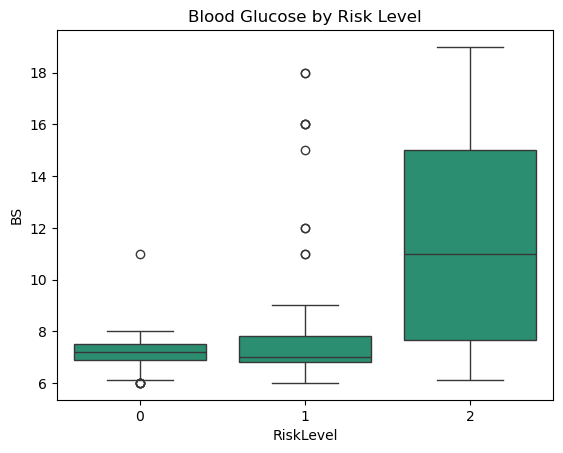

In [76]:
sns.boxplot(x=df.RiskLevel, y=df.BS).set_title("Blood Glucose by Risk Level");

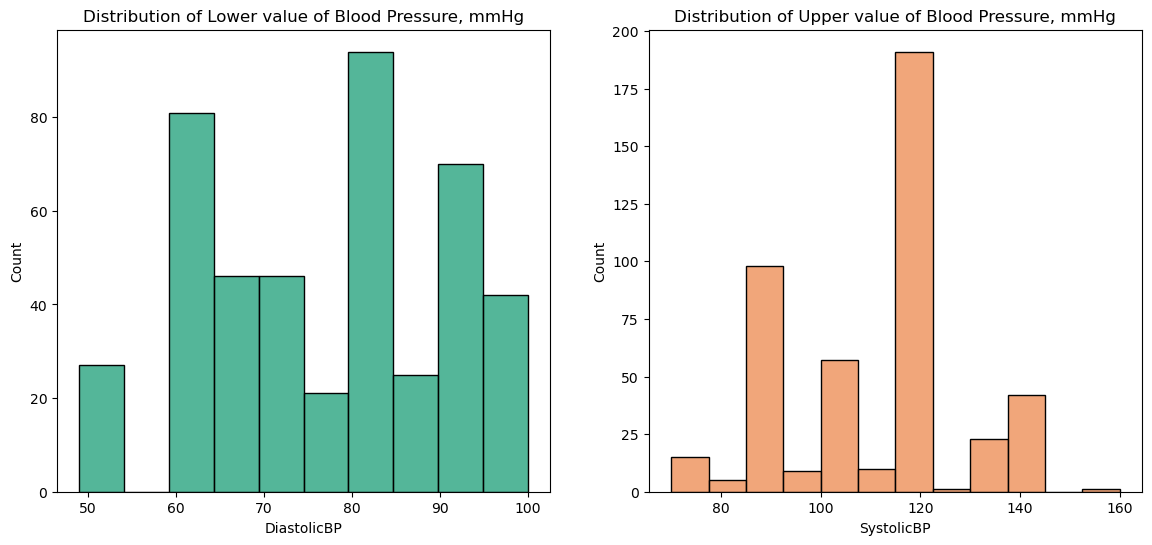

In [77]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.DiastolicBP)
axes[0].set_title("Distribution of Lower value of Blood Pressure, mmHg")

sns.histplot(ax=axes[1], x=df.SystolicBP, color="#ed894e")
axes[1].set_title("Distribution of Upper value of Blood Pressure, mmHg");

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


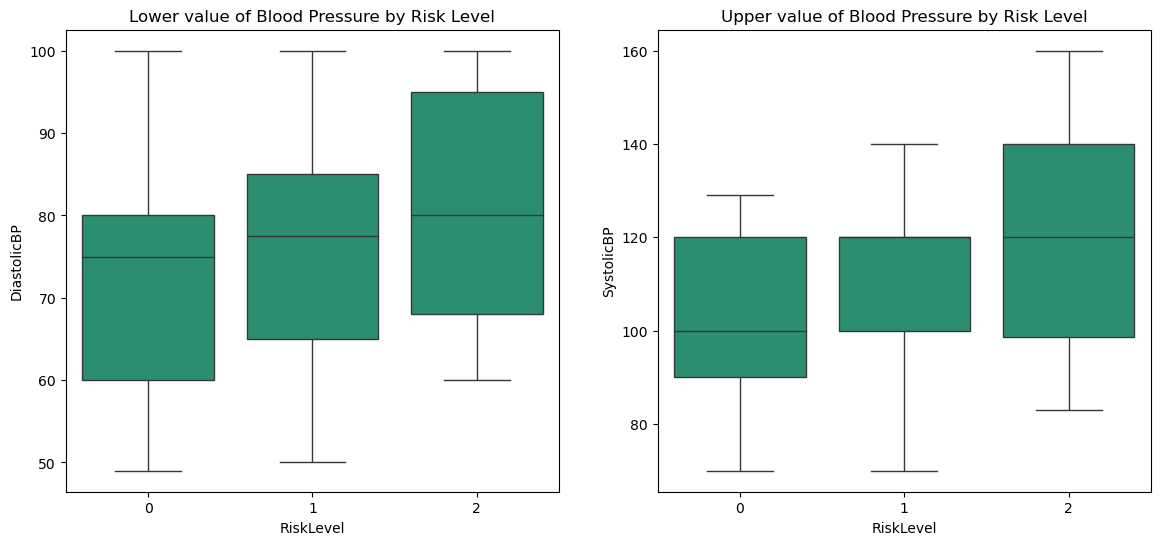

In [79]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.boxplot(ax=axes[0], x=df.RiskLevel, y=df.DiastolicBP)
axes[0].set_title("Lower value of Blood Pressure by Risk Level")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.SystolicBP)
axes[1].set_title("Upper value of Blood Pressure by Risk Level");

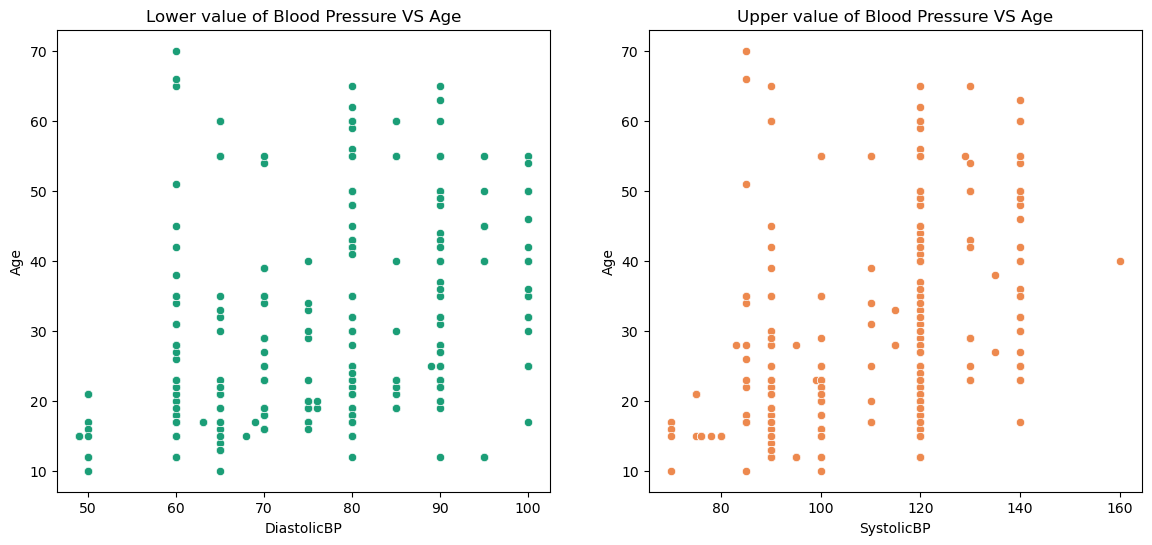

In [80]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.scatterplot(x=df.DiastolicBP, y=df.Age, ax=axes[0])
axes[0].set_title("Lower value of Blood Pressure VS Age")

sns.scatterplot(ax=axes[1], x=df.SystolicBP, y=df.Age, color="#ed894e")
axes[1].set_title("Upper value of Blood Pressure VS Age");

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


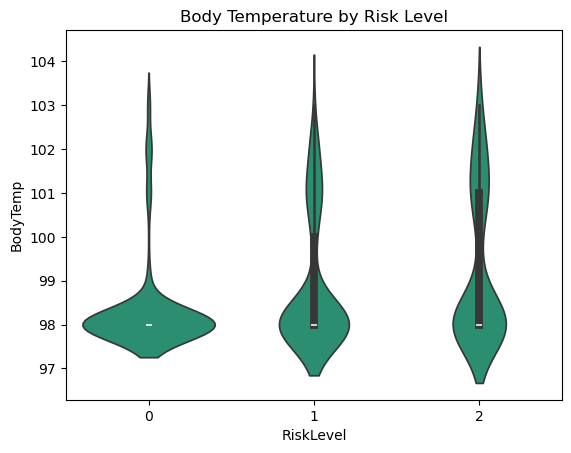

In [81]:
sns.violinplot(y=df.BodyTemp, x=df.RiskLevel).set_title("Body Temperature by Risk Level");

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


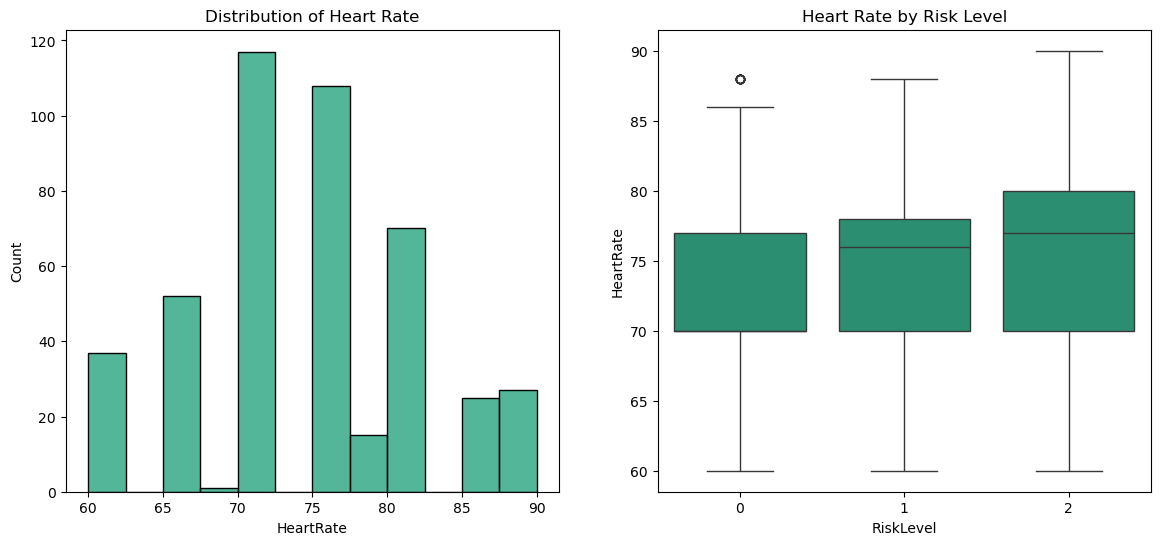

In [82]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.HeartRate)
axes[0].set_title("Distribution of Heart Rate")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.HeartRate)
axes[1].set_title("Heart Rate by Risk Level");

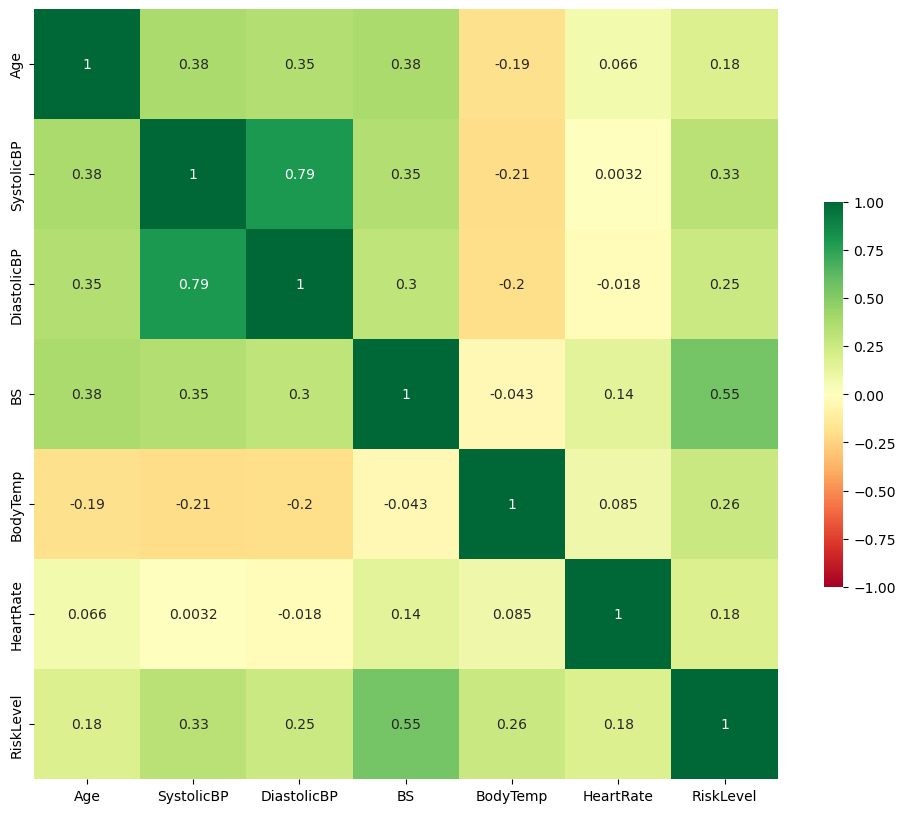

In [83]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn', vmin=-1, center=0,
           cbar_kws={"shrink": .5})

plt.show()

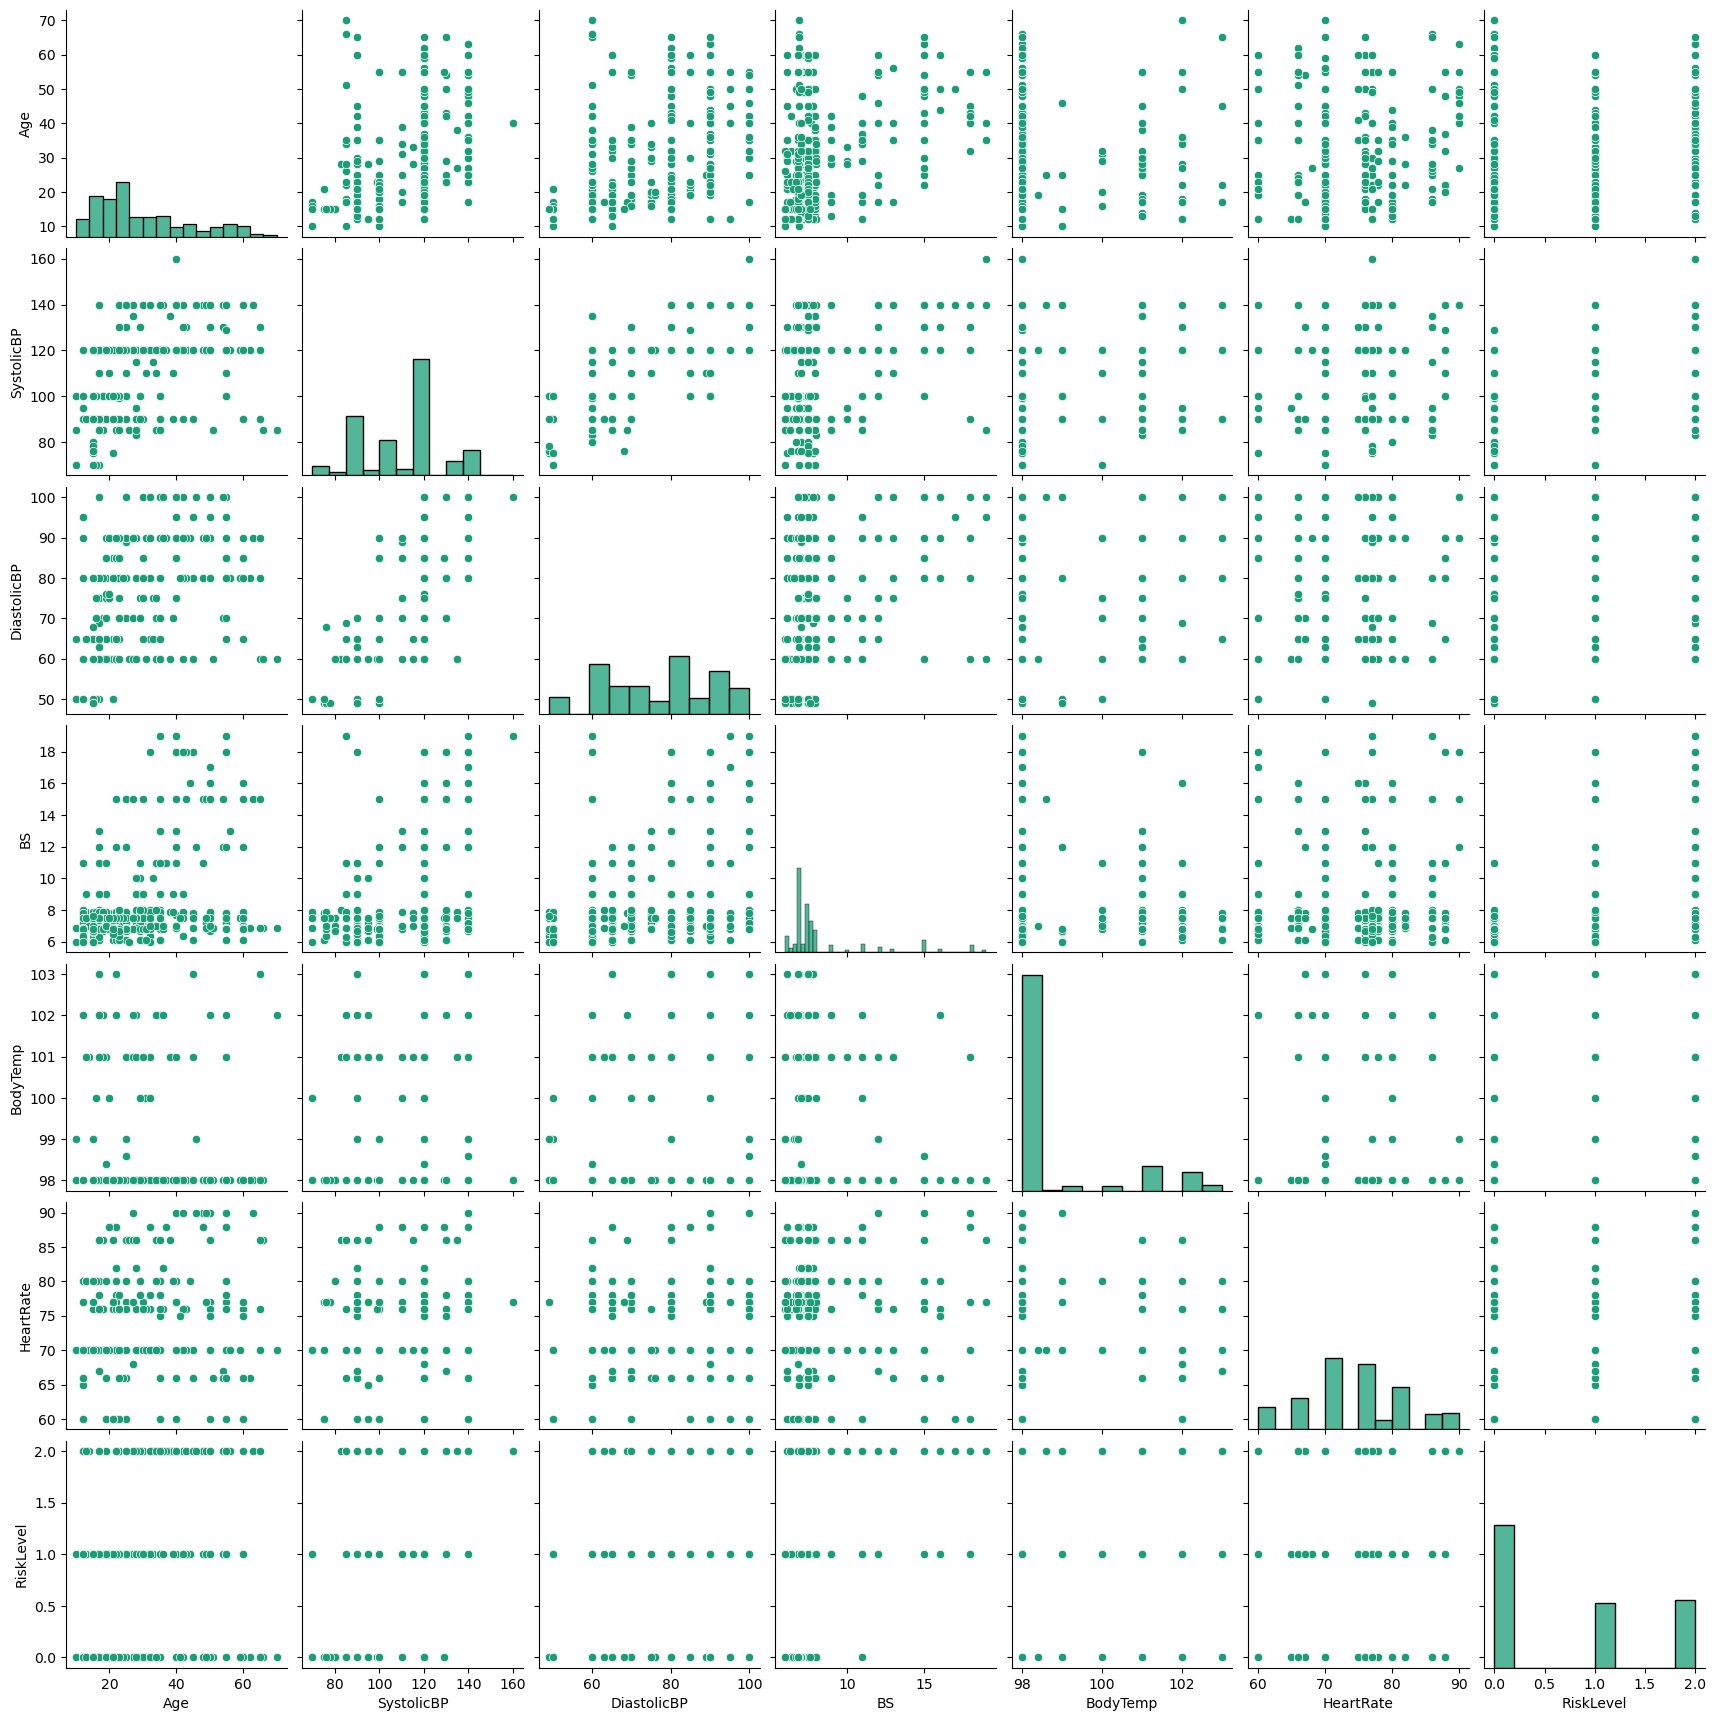

In [84]:
sns.pairplot(df);

In [85]:
skew_limit = 0.75 # define a limit above which we will log transform

# Create a list of numerical colums to check for skewing
mask = data.dtypes != object
num_cols = data.columns[mask]

skew_vals = df[num_cols].skew()

In [86]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
BS,2.262874
BodyTemp,1.751794
Age,0.922079


0.197419127736239


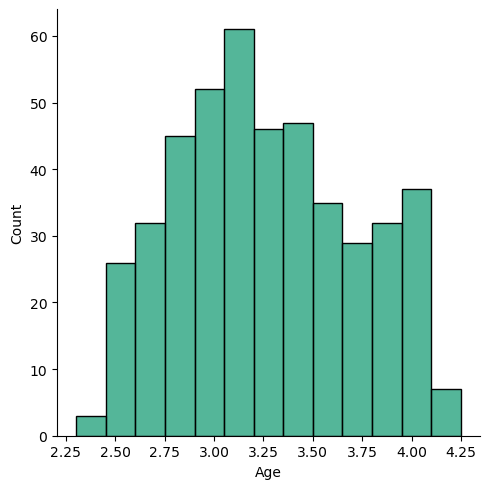

In [87]:
df_transformed = df.copy()

df_transformed["Age"] = df["Age"].apply(np.log)
print(df_transformed["Age"].skew())
sns.displot(df_transformed.Age);

In [88]:
bc_result = boxcox(df.BS)
boxcox_bs = pd.DataFrame(bc_result[0], columns=['BS'])
lambd = bc_result[1]

In [89]:
lambd

-3.3440041657535655

BS    0.264687
dtype: float64


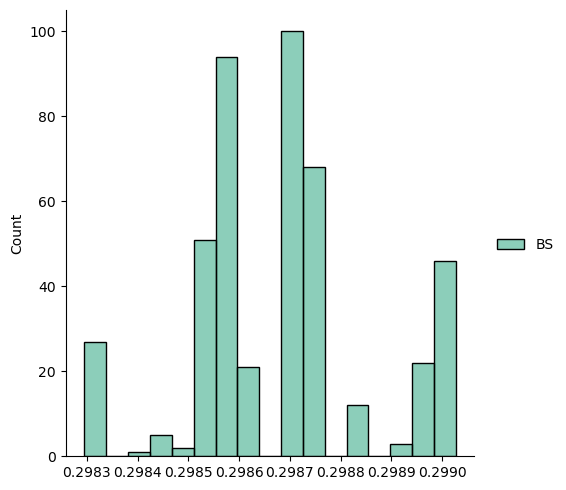

In [90]:
print(boxcox_bs.skew())
sns.displot(boxcox_bs);

In [91]:
df_transformed['BS'] = boxcox_bs['BS']

In [92]:
df_transformed[['BS', 'Age']].skew().to_frame().rename(columns={0:'Skew'}).sort_values('Skew', ascending=False)

,Skew
BS,0.264687
Age,0.197419


In [93]:
X = df_transformed.drop('RiskLevel', axis=1)
y = df_transformed['RiskLevel']

In [94]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)

In [96]:
# Initialize the XGBClassifier
xgb_model = xgb.XGBClassifier(n_estimators=50)

# Define hyperparameters to tune
param_grid = {
    'eta': [0.01, 0.05, 0.1, 0.35],
    'max_depth': [2, 4, 7, 9, 12, 17],
    'min_child_weight': [2, 4, 7, 9, 12, 17]
}

# Perform Grid Search Cross Validation to find the best hyperparameters
xgb_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)
xgb_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=50,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.01, 0.05, 0.1, 0.35],
                         'max_depth': [2, 4, 7, 9, 12, 17],
                         'min_child_weight': [2, 4, 7, 9, 12, 17]})

In [97]:
xgb_classifier = xgb_search.best_estimator_

# Fit the best model to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_classifier.predict(X_test)
print("Best parameters found:", xgb_search.best_params_)

Best parameters found: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 2}


In [98]:
# Evaluate the model
print('XGBoost Classifier')
print('\n')
print(confusion_matrix(y_test,xgb_pred))
print("\n")
print(classification_report(y_test, xgb_pred))

XGBoost Classifier


[[70  0  0]
 [23  6  3]
 [ 5  3 26]]


              precision    recall  f1-score   support

           0       0.71      1.00      0.83        70
           1       0.67      0.19      0.29        32
           2       0.90      0.76      0.83        34

    accuracy                           0.75       136
   macro avg       0.76      0.65      0.65       136
weighted avg       0.75      0.75      0.70       136



In [99]:
import joblib

# Save the best model
joblib.dump(xgb_classifier, 'model/best_xgb_model.pkl')

['model/best_xgb_model.pkl']

In [105]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Load your dataset
df_transformed = pd.read_csv("Data_Sets/Maternal Health Risk Data Set.csv")

# Inspect the column names
print("Column names in the dataset:", df_transformed.columns)

# Update feature list based on actual column names
features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Select only the features needed for the model
X = df_transformed[features]

# Initialize and fit the scaler
scaler = StandardScaler()
scaler.fit(X)

# Save the scaler
joblib.dump(scaler, 'model/scaler21.joblib')

Column names in the dataset: Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')


['model/scaler21.joblib']